In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_excel('/content/training.xlsx')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Batch ID  81 non-null     int64  
 1   M3_loss   81 non-null     float64
 2   M2_Loss   61 non-null     float64
 3   M1_loss   61 non-null     float64
 4   M3_mAP    71 non-null     float64
 5   M2_mAP    51 non-null     float64
 6   M1_mAP    51 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.6 KB


In [ ]:
#df.to_excel('/content/training.xlsx',index=False)

In [13]:
df.head()

,Batch ID,M3_loss,M2_Loss,M1_loss,M3_mAP,M2_mAP,M1_mAP
0,0,2107.0,2127.7,1273.3,NaN,NaN,NaN
1,100,1998.0,2044.4,1451.3,NaN,NaN,NaN
2,200,1908.0,1935.3,1332.2,NaN,NaN,NaN
3,300,1897.0,1904.9,1234.1,NaN,NaN,NaN
4,400,2010.0,2049.7,884.5,NaN,NaN,NaN


## Plot Individual Models

In [37]:
plt.style.use('seaborn-poster')

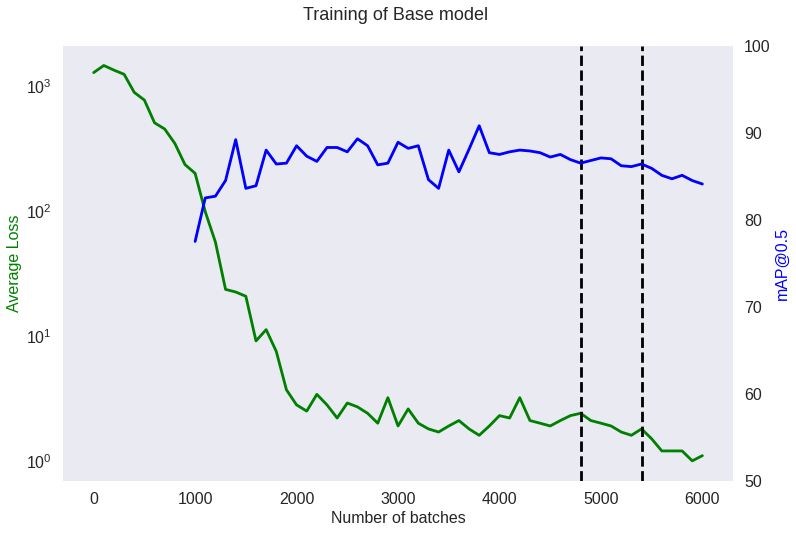

In [38]:
fig, ax1 = plt.subplots(figsize=(12,8))
plt.title('Training of Base model \n ', size=18)
ax2 = ax1.twinx()
ax1.plot(df['Batch ID'], df['M1_loss'],'g-')
ax1.axvline(4800, color='black',ls='--')
ax1.axvline(5400, color='black',ls='--')
ax2.plot(df['Batch ID'], df['M1_mAP'],'b-')

ax1.set_xlabel('Number of batches',size=16)
ax1.set_ylabel('Average Loss', color='g',size=16)
ax1.set_yscale('log')
ax2.set_ylabel('mAP@0.5', color='b',size=16)
ax2.set_ylim(50,100)
plt.show()

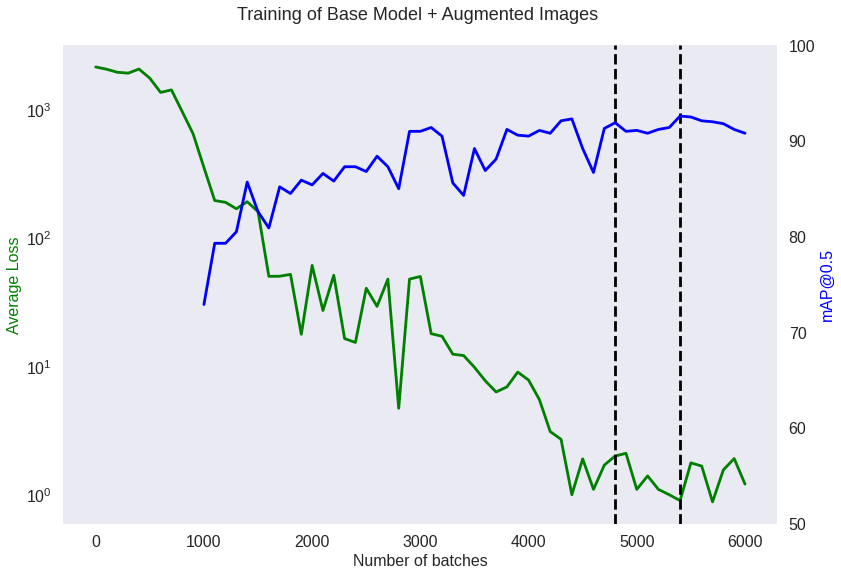

In [39]:
fig, ax1 = plt.subplots()
plt.title('Training of Base Model + Augmented Images \n', size=18)
ax2 = ax1.twinx()
ax1.plot(df['Batch ID'], df['M2_Loss'],'g-')
ax2.plot(df['Batch ID'], df['M2_mAP'],'b-')
ax1.axvline(4800, color='black',ls='--')
ax1.axvline(5400, color='black',ls='--')
ax1.set_xlabel('Number of batches',size=16)
ax1.set_ylabel('Average Loss', color='g',size=16)
ax1.set_yscale('log')
ax2.set_ylabel('mAP@0.5', color='b',size=16)
ax2.set_ylim(50,100)

plt.show()

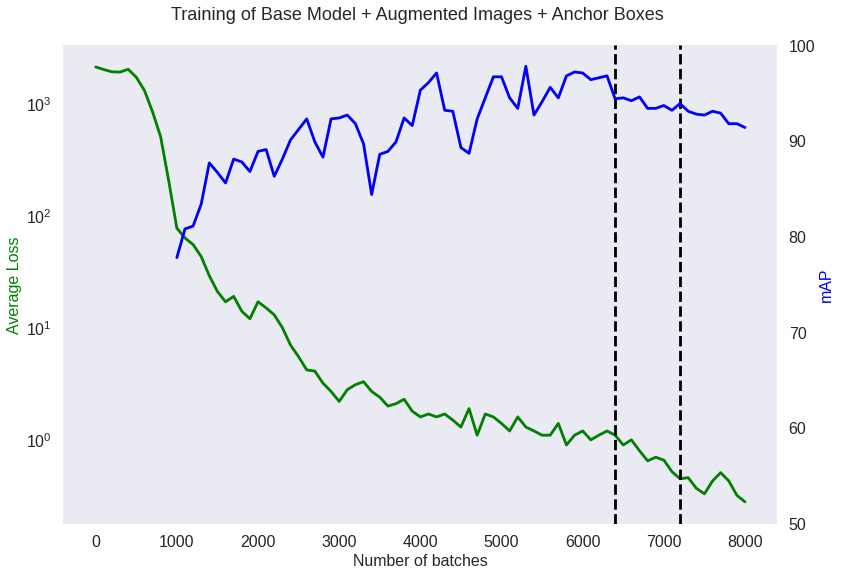

In [40]:
fig, ax1 = plt.subplots()
plt.title('Training of Base Model + Augmented Images + Anchor Boxes \n', size=18)
ax2 = ax1.twinx()
ax1.plot(df['Batch ID'], df['M3_loss'],'g-')
ax2.plot(df['Batch ID'], df['M3_mAP'],'b-')
ax1.axvline(6400, color='black',ls='--')
ax1.axvline(7200, color='black',ls='--')
ax1.set_xlabel('Number of batches',size=16)
ax1.set_ylabel('Average Loss', color='g',size=16)
ax1.set_yscale('log')
ax2.set_ylabel('mAP', color='b',size=16)
ax2.set_ylim(50,100)

plt.show()

## Compare Models


In [18]:
plt.style.use('ggplot')

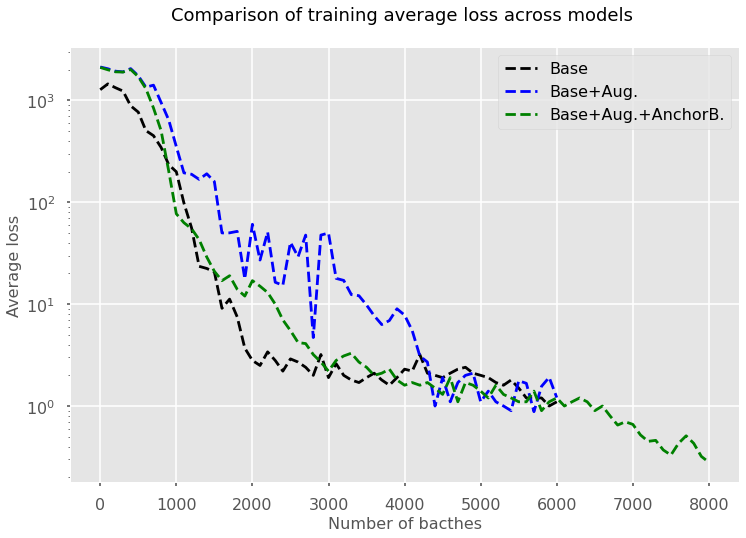

In [19]:
plt.figure(figsize=(12,8))
plt.title('Comparison of training average loss across models \n', size=18)
plt.plot(df['Batch ID'],df['M1_loss'],label='Base',ls='--',color='black')
plt.plot(df['Batch ID'],df['M2_Loss'],label='Base+Aug.',ls='--',color='blue')
plt.plot(df['Batch ID'],df['M3_loss'],label='Base+Aug.+AnchorB.',ls='--',color='green')
plt.xlabel('Number of bacthes', size=16)
plt.ylabel('Average loss', size=16)
plt.legend()
plt.yscale('log')
plt.show()

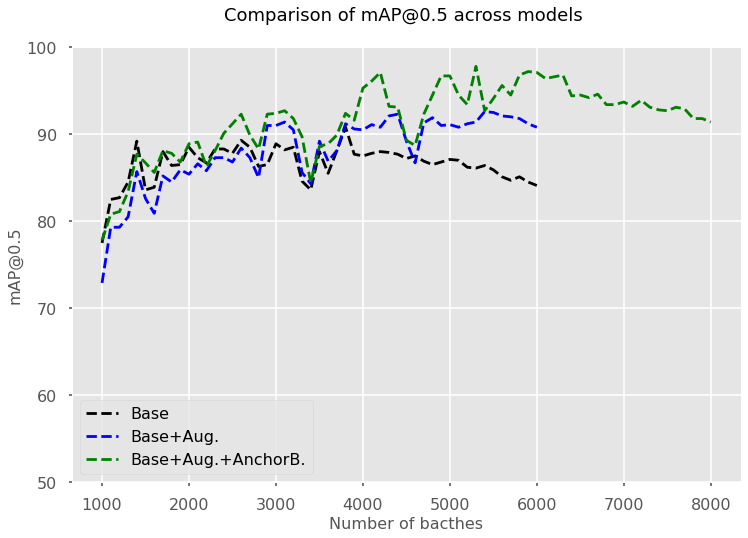

In [20]:
plt.figure(figsize=(12,8))
plt.title('Comparison of mAP@0.5 across models \n', size=18)
plt.plot(df['Batch ID'],df['M1_mAP'],label='Base', ls='--',color='black')
plt.plot(df['Batch ID'],df['M2_mAP'],label='Base+Aug.',ls='--',color='blue')
plt.plot(df['Batch ID'],df['M3_mAP'],label='Base+Aug.+AnchorB.',ls='--',color='green')
plt.xlabel('Number of bacthes', size=16)
plt.ylabel('mAP@0.5', size=16)
plt.legend()

plt.ylim(50,100)
plt.show()